# Batter data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('batter.csv')
df.head()

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   batter       605 non-null    object 
 1   runs         605 non-null    int64  
 2   avg          572 non-null    float64
 3   strike_rate  605 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.0+ KB


In [14]:
df.describe()

,runs,avg,strike_rate
count,605.000000,605.000000,605.000000
mean,464.428099,15.911835,100.663736
std,985.272855,10.196963,39.956250
min,0.000000,0.000000,0.000000
25%,15.000000,8.000000,78.750000
50%,73.000000,15.000000,107.270000
75%,326.000000,22.610000,125.000000
max,6634.000000,55.670000,400.000000


In [6]:
df.isna().sum()

batter          0
runs            0
avg            33
strike_rate     0
dtype: int64

In [48]:
df.duplicated().sum()

0

# Filling misiing values in average column

In [49]:
df['avg']=df['avg'].fillna(df['avg'].mean())

# round of the decimal values

In [50]:
df['avg'] = df['avg'].round(2)
df.head()

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.25,125.98
1,S Dhawan,6244,34.88,122.84
2,DA Warner,5883,41.43,136.40
3,RG Sharma,5881,30.31,126.96
4,SK Raina,5536,32.37,132.54


In [51]:
df['strike_rate'] = df['strike_rate'].round(2)

In [52]:
df.sort_values(by='runs',ascending=False).head(10)

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.25,125.98
1,S Dhawan,6244,34.88,122.84
2,DA Warner,5883,41.43,136.40
3,RG Sharma,5881,30.31,126.96
4,SK Raina,5536,32.37,132.54
5,AB de Villiers,5181,39.85,148.58
6,CH Gayle,4997,39.66,142.12
7,MS Dhoni,4978,39.20,130.93
8,RV Uthappa,4954,27.52,126.15
9,KD Karthik,4377,26.85,129.27


In [53]:
df.sort_values(by='avg',ascending=False).head(10)

,batter,runs,avg,strike_rate
221,MN van Wyk,167,55.67,123.70
13,KL Rahul,3895,46.93,132.80
209,AC Voges,181,45.25,126.57
112,HM Amla,577,44.38,138.04
284,Iqbal Abdulla,88,44.00,102.33
174,DP Conway,252,42.00,143.18
2,DA Warner,5883,41.43,136.40
192,PD Collingwood,203,40.60,127.67
119,AK Markram,527,40.54,131.75
134,RM Patidar,404,40.40,136.03


In [54]:
df.sort_values(by='strike_rate',ascending=False).head(10)

,batter,runs,avg,strike_rate
533,PN Mankad,4,15.91,400.00
526,B Stanlake,5,15.91,250.00
360,Umar Gul,39,13.00,205.26
538,RS Sodhi,4,15.91,200.00
203,TH David,187,31.17,198.94
290,Shahid Afridi,81,10.12,176.09
510,I Malhotra,7,15.91,175.00
418,TU Deshpande,21,21.00,175.00
266,LJ Wright,106,21.20,168.25
45,AD Russell,2039,29.99,168.23


In [55]:
run_300 = df[df['runs']>=800]
run_300 = run_300.sort_values(by='strike_rate', ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'AD Russell'),
  Text(1, 0, 'SP Narine'),
  Text(2, 0, 'V Sehwag'),
  Text(3, 0, 'AB de Villiers'),
  Text(4, 0, 'GJ Maxwell'),
  Text(5, 0, 'JC Buttler'),
  Text(6, 0, 'N Pooran'),
  Text(7, 0, 'SO Hetmyer'),
  Text(8, 0, 'PP Shaw'),
  Text(9, 0, 'RR Pant')])

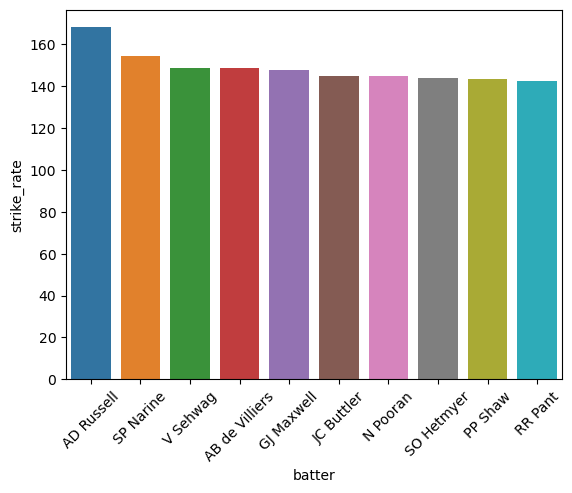

In [56]:
sns.barplot(x=run_300['batter'], y=run_300['strike_rate'])
plt.xticks(rotation=45)

<Axes: xlabel='avg', ylabel='strike_rate'>

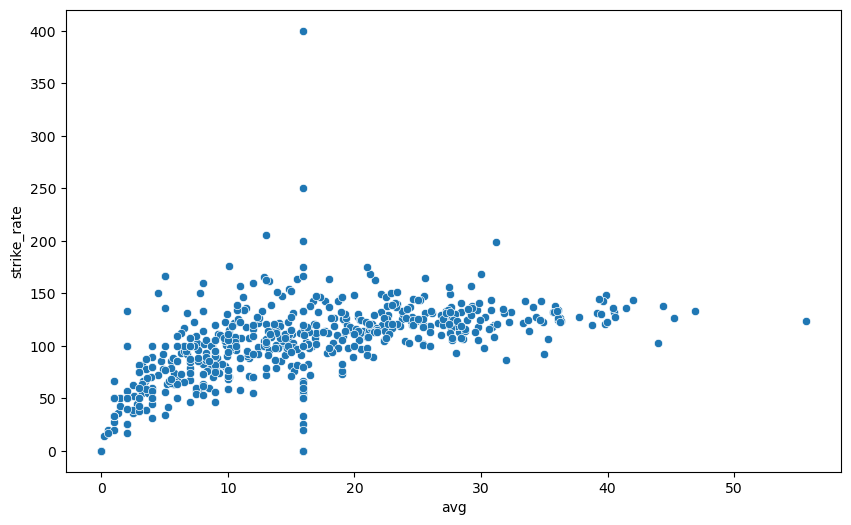

In [57]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['avg'],y=df['strike_rate'])

#for i in range(df.shape[0]):
    #plt.text(df['avg'].values[i], df['strike_rate'].values[i],df['batter'].values[i])


In [58]:
run = df.sort_values(by='runs',ascending=False).head(10)

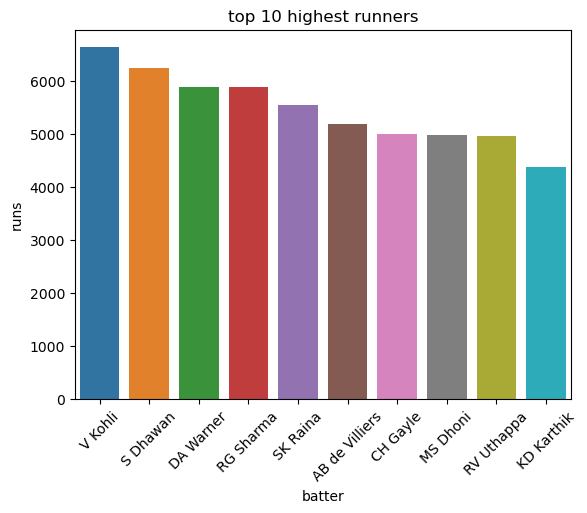

In [59]:
sns.barplot(x=run['batter'], y=run['runs'])
plt.xticks(rotation=45)
plt.title('top 10 highest runners')
plt.show()

In [60]:
avg = df.sort_values(by='avg',ascending=False).head(10)
sr = df.sort_values(by='strike_rate',ascending=False).head(10)

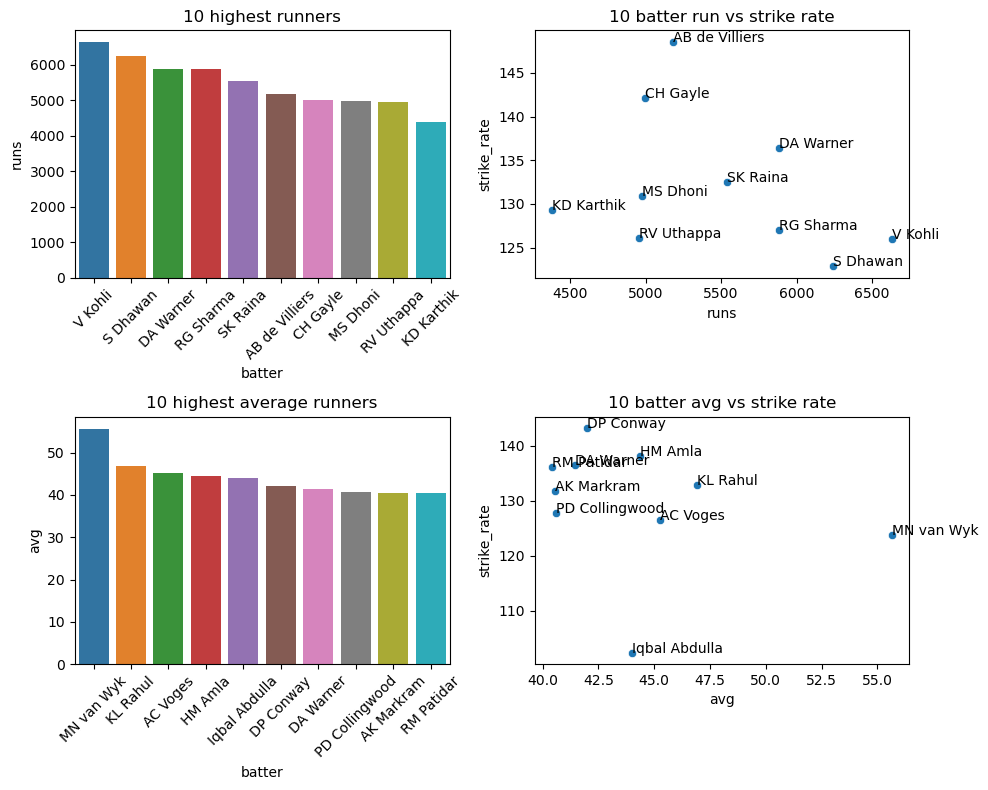

In [64]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,8))

sns.barplot(x=run['batter'], y=run['runs'], ax=ax[0,0])
ax[0,0].set_title('10 highest runners')
ax[0,0].set_xticklabels(run['batter'],rotation=45)


sns.scatterplot(x=run['runs'],y=run['strike_rate'], ax=ax[0,1])
for i in range(run.shape[0]):
    ax[0,1].text(run['runs'].values[i],run['strike_rate'].values[i], run['batter'].values[i])
ax[0,1].set_title('10 batter run vs strike rate')

sns.barplot(x=avg['batter'],y=avg['avg'], ax=ax[1,0])
ax[1,0].set_title('10 highest average runners')
ax[1,0].set_xticklabels(avg['batter'],rotation=45)

sns.scatterplot(x=avg['avg'],y=avg['strike_rate'], ax=ax[1,1])
for i in range(avg.shape[0]):
    ax[1,1].text(avg['avg'].values[i],avg['strike_rate'].values[i], avg['batter'].values[i])
ax[1,1].set_title('10 batter avg vs strike rate')



plt.tight_layout()
plt.show()